In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="white")

### HR Human Resources Analytics Kaggle Dataset
This is a simulated dataset from Kaggle:
https://www.kaggle.com/ludobenistant/hr-analytics

My goal for this project is to predict which employees will leave next by using the fields in the dataset, and practice feature engineering and predictive analytics. 

#### Table of Contents

1. Descriptive Analytics
2. Data Prepation and Feature Selection
3. Retention Prediction
4. Model Analysis and Refactor

#### 1. Descriptive Analytics

Reading in the dataset, which I've downloaded locally on my computer:

In [4]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


We're not given descriptions on the columns explicitly mean, so I'll make some assumptions:

* <b>satisfaction_level:</b> possible values 0 to 1, with 1 being the best. last employee measured satisfaction level
* <b>last_evaluation:</b> possible values (0 to 1), last employer evaluation of the employee
* <b>number_project:</b> number of projects the employee worked on during their duration at the company
* <b>average_montly_hours:</b> average monthly hours the employee spent working at the company
* <b>time_spend_company:</b> integer value in years spent at the company (assumed it was rounded to the nearest whole year)
* <b>Work_accident:</b> binary (1 or 0). 1 meaning 'yes the employee had a workplace accident' and 0 meaning 'no they have not'
* <b>left:</b> binary (1 or 0). 1 meaning 'yes the employee left' and 0 meaning 'no they have not'
* <b>promotion_last_5years:</b> binary (1 or 0). 1 meaning 'yes the employee had a promotion' and 0 meaning 'no they have not'
* <b>sales:</b> department the employee worked in.
* <b>salary:</b> possible values are high, medium, low. We don't have actual numbers for what values those classifications refer to

In [183]:
print ('number of rows:', len(df))
print ('number of cols (features):', len(df.columns))

number of rows: 14999
number of cols (features): 10


Exploring some of the features. Looks like the 'sales' column represents the job category

In [184]:
print('Job Category (raw count):','\n') 
print(df.sales.value_counts())
print('\n','Job Category (% of total):','\n') 
print(df.sales.value_counts()/len(df)*100.0)

Job Category (raw count): 

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

 Job Category (% of total): 

sales          27.601840
technical      18.134542
support        14.860991
IT              8.180545
product_mng     6.013734
marketing       5.720381
RandD           5.247016
accounting      5.113674
hr              4.926995
management      4.200280
Name: sales, dtype: float64


TODO: add brief comment on this breakdown. Looking at the salary field broken down by different job category:

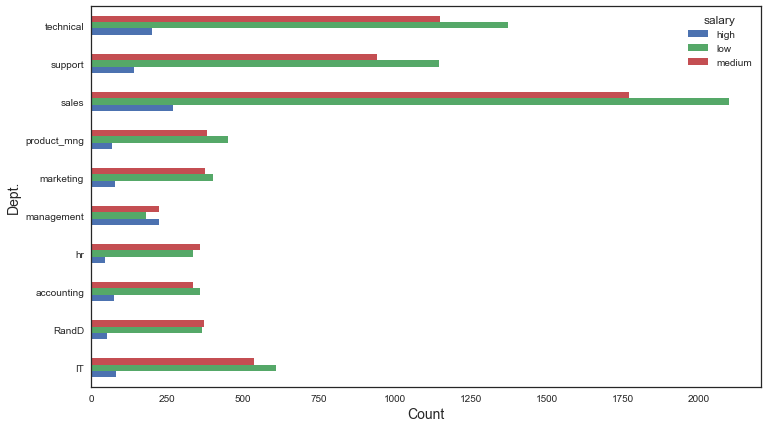

In [185]:
fig,ax = plt.subplots(figsize=(12,7))
df.groupby(['sales','salary']).satisfaction_level.count().unstack().sort_index(axis=0).plot(kind='barh',ax=ax)
ax.set_xlabel('Count',size=14);
ax.set_ylabel('Dept.',size=14);

Interesting view on the relative number of employees in each department with 'high', 'medium' and 'low' salaries. Not surprising to see management with both a small count and a high number of 'high' salaries - relative to medium and low count. Based on the size of the

In [186]:
df.satisfaction_level.describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

mean satisfaction level at the company is 0.61%, someone scored as low as 0.09 on their last eval. Not derived from a very sophisticated 'model' but I'd guess this person is likely to leave soon :P

In [187]:
boxdata = []
dept = []
for d in df.sales.unique():
    dept.append(d)
    boxdata.append(list(df[df.sales==d].satisfaction_level))

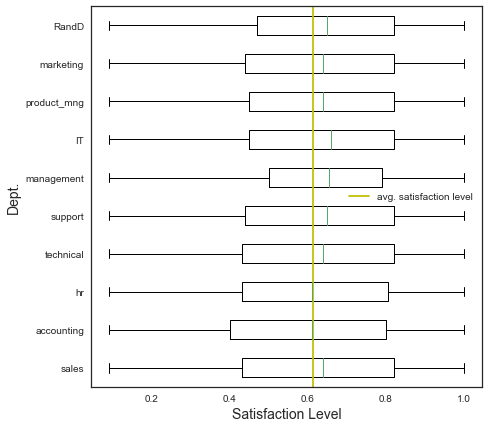

In [188]:
fig,ax = plt.subplots(figsize=(7,7))
plt.boxplot(boxdata,0, 'rs', 0);
ax.set_yticklabels(dept);
plt.axvline(x=df.satisfaction_level.mean(),c='y',label='avg. satisfaction level')
ax.set_xlabel('Satisfaction Level',size=14);
ax.set_ylabel('Dept.',size=14);
ax.legend()

TODO: comment on the box plot

Looking at correlation across features.

Correlation matrix showing the relationship between variables. Plotting code referenced here: http://seaborn.pydata.org/examples/many_pairwise_correlations.html

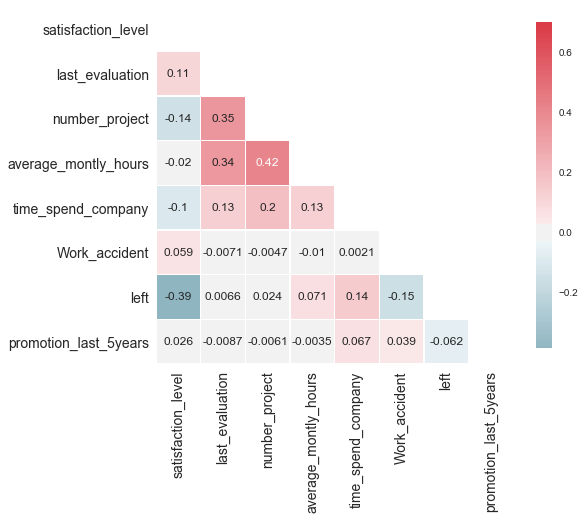

In [189]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,center=0,vmax=0.7,
            square=True, linewidths=.5,cbar_kws={"shrink": .75},
           annot=True)
ax.set_xticklabels(df.columns,size=14);
ax.set_yticklabels(df.columns,size=14);

Not surprising to a positive correlation between number of projects and monthly hours and last evaluation. Also not surprising to see a negative correlation (the strongest negative correlation in the set) between satisfaction level and the left variable.

#### 2. Data Prepation and Feature Selection

Need to first find and fill missing values in the dataset:

In [190]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

no missing values!!

Todo: 
* take a closer look at each feature for outliers. Current assumption is that there are none...

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
df_model = df.copy()

In [193]:
df_model.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [194]:
num_cols = ['satisfaction_level','last_evaluation','number_project',
           'average_montly_hours','time_spend_company','Work_accident',
           'promotion_last_5years']
cat_cols = ['sales','salary']
target_cols = ['left']

encode the categorical columns with values:

In [195]:
from sklearn.preprocessing import LabelEncoder

In [196]:
for c in cat_cols:
 number = LabelEncoder()
 df_model[c] = number.fit_transform(df_model[c].astype('str'))

compare the original dataframe with the new (df_model), which has the enoded *sales* and *salary* features:

In [197]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [198]:
df_model.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


looks good!

Now we can split the dataset into train and test set:

In [199]:
x = df_model[['satisfaction_level','last_evaluation','number_project',
        'average_montly_hours','time_spend_company','Work_accident',
        'promotion_last_5years','sales','salary']]
y = df_model['left']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)

#### 3. Retention Prediction

In [200]:
from sklearn.ensemble import RandomForestClassifier

In [201]:
forest = RandomForestClassifier() #max_depth=5,n_estimators = 100
forest_model = forest.fit(xtrain, ytrain)
predict = forest_model.predict(xtest)

#### 4. Model Analysis and Refactor

In [202]:
train_score = forest_model.score(xtrain, ytrain)
test_score  = forest_model.score(xtest, ytest)
print('train score:', train_score)
print('test score:', test_score)

train score: 0.998333194433
test score: 0.99


In [203]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [204]:
print("Feature ranking:")
print('\n')
for f in range(len(xtrain.columns)):
    print('{0}. {1} : ({2})'.format(f + 1, xtrain.columns[indices[f]], importances[indices[f]]))

Feature ranking:


1. satisfaction_level : (0.348000521018278)
2. number_project : (0.19883723256079033)
3. time_spend_company : (0.18336949137885086)
4. average_montly_hours : (0.13103241414514982)
5. last_evaluation : (0.10462153626761209)
6. Work_accident : (0.012035174747484256)
7. sales : (0.011875873471865804)
8. salary : (0.009290602742848571)
9. promotion_last_5years : (0.0009371536671202831)


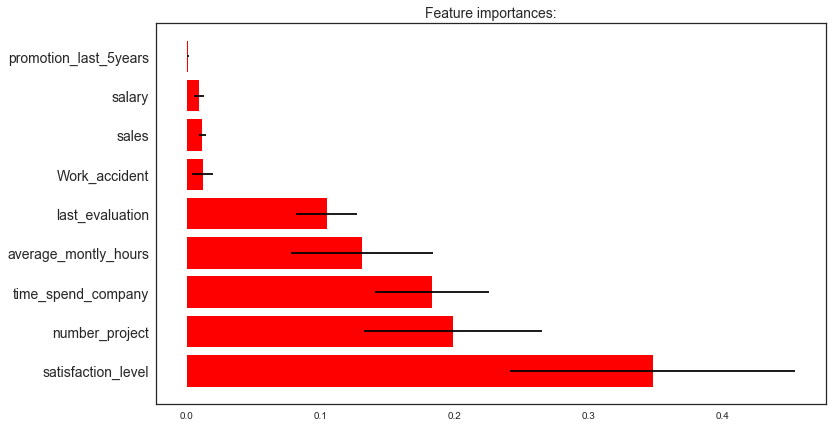

In [217]:
fig,ax = plt.subplots(figsize=(12,7))
ax.barh(range(len(xtrain.columns)), importances[indices],
       color="r", xerr=std[indices], align="center")
ax.set_yticks(range(len(xtrain.columns)))
ax.set_yticklabels(xtrain.columns[indices],fontsize=14)
ax.set_title('Feature importances:',fontsize=14);

TODO: comment on the feature importance, not surprising to see satisfaction level at the top.
it is interesting to see salary so low...

also this doesn't tell us about whether the higher the variable the better or worse. Ex. is a high time_spend_company better or worse for retention. We know it is important, but in which direction?

In [218]:
from sklearn.metrics import confusion_matrix

In [221]:
confusion_matrix(ytest,predict)

array([[2311,    1],
       [  29,  659]])

In [222]:
from pandas_ml import ConfusionMatrix

In [224]:
cm = ConfusionMatrix(ytest,predict)
print (cm) #not right

Predicted  0.0  1.0  __all__
Actual                      
0.0        173   40      213
1.0        292   87      379
__all__    465  127      592
